In [1]:
# making a separate directory of kaggle
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! kaggle datasets download soumikrakshit/nyu-depth-v2

100% 4.10G/4.10G [02:26<00:00, 40.3MB/s]
100% 4.10G/4.10G [02:26<00:00, 30.1MB/s]


In [3]:
import zipfile
with zipfile.ZipFile("/content/nyu-depth-v2.zip","r") as f:
  print("Unzipping File..")
  f.extractall()

Unzipping File..


In [4]:
import torch
import random
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import imghdr
import torch.nn.functional as F

In [5]:
dir_path ="/content/nyu_data" 

In [6]:
def walk_through_directory(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [7]:
dirr_path = "/content/nyu_data/data/nyu2_train"

In [8]:
walk_through_directory(dirr_path)

There are 284 directories and 0 images in '/content/nyu_data/data/nyu2_train'.
There are 0 directories and 508 images in '/content/nyu_data/data/nyu2_train/bedroom_0140_out'.
There are 0 directories and 116 images in '/content/nyu_data/data/nyu2_train/study_0006_out'.
There are 0 directories and 66 images in '/content/nyu_data/data/nyu2_train/bedroom_0045_out'.
There are 0 directories and 60 images in '/content/nyu_data/data/nyu2_train/bathroom_0023_out'.
There are 0 directories and 274 images in '/content/nyu_data/data/nyu2_train/bedroom_0129_out'.
There are 0 directories and 782 images in '/content/nyu_data/data/nyu2_train/furniture_store_0002b_out'.
There are 0 directories and 128 images in '/content/nyu_data/data/nyu2_train/bedroom_0094_out'.
There are 0 directories and 172 images in '/content/nyu_data/data/nyu2_train/study_room_0005a_out'.
There are 0 directories and 480 images in '/content/nyu_data/data/nyu2_train/bedroom_0078_out'.
There are 0 directories and 318 images in '/con

In [9]:
def imagepath(image_path):
  if (image_path[-3:] == 'jpg'):
    image_path1 = image_path[:-3] + 'png'
    return(image_path1)
  elif(image_path[-3:] == 'png'):
    image_path1 = image_path[:-3] + 'jpg'
    return(image_path1)

computer_lab_0002_out
/content/nyu_data/data/nyu2_train/computer_lab_0002_out/63.png
/content/nyu_data/data/nyu2_train/computer_lab_0002_out/63.jpg


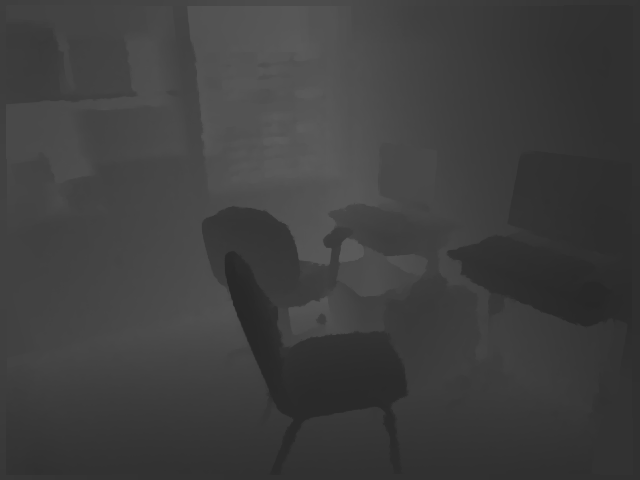

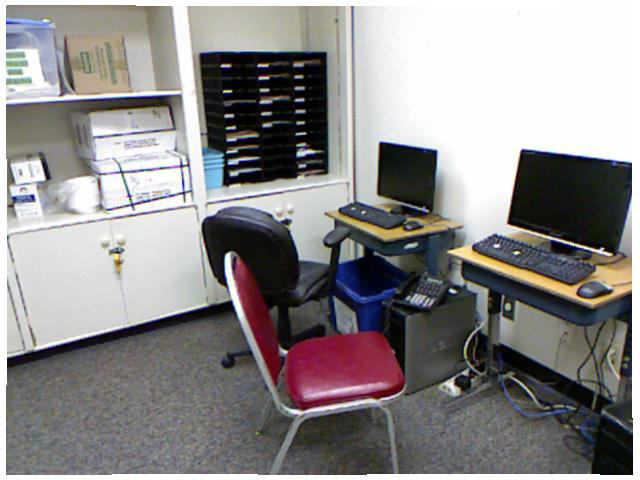

480 640


In [10]:
path = dirr_path
files = os.listdir(path)
Class_name = random.choice(files)
file_path = path +'/'+ Class_name
#print(file_path)
image = os.listdir(file_path)
image.sort()
#print(image)  # listdir gives you a list with all filenames in the provided path.
random_image = random.choice(image) 
#print(random_image)
print(Class_name) 
image_path = file_path + '/' + random_image
print(image_path)
image_path1 = imagepath(image_path)
print(image_path1)
image = Image.open(image_path)  # displayed the image
image1 = Image.open(image_path1)
image.show()
image1.show()
width= image.size[0] 
height = image.size[1]
print(height,width)

In [11]:
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

In [12]:
from torch.utils.data import Dataset
from skimage import io
from PIL import Image

class ImageFolderCustom(Dataset):
  def __init__(self,target_dir,csv_file, is_train):
    if is_train:
      self.transform_img = transforms.Compose(
          [
              transforms.ToTensor(),
              transforms.Resize((228,304)),
              transforms.Normalize(mean,std)
        ])
      self.transform_label = transforms.Compose(
          [
              transforms.ToTensor(),
              transforms.Resize((55,74)),
        ])
    else:
      self.transform_img = transforms.Compose(
          [
              transforms.ToTensor(),
              transforms.Resize((228,304)),
              transforms.Normalize(mean,std)
        ])
      self.transform_label = transforms.Compose(
          [
              transforms.ToTensor(),
              transforms.Resize((55,74)),
        ])

    self.taget_dir = target_dir
    self.data = pd.read_csv(csv_file, names=['image', 'depth_image'])
  def __len__(self):
    return len(self.data)

  def __getitem__(self,index):
    image_path = "nyu_data/" +  self.data.iloc[index]['image']
    image = np.array(Image.open(image_path))
    image = self.transform_img(image)

    
    depth_image = "nyu_data/" + self.data.iloc[index]['depth_image']
    image_depth = np.array(Image.open(depth_image))
    image_depth = self.transform_label(image_depth)
    return image,image_depth

In [13]:
data_dir = "/content/nyu_data/data"

In [14]:
os.listdir(data_dir)

['nyu2_train.csv', 'nyu2_test', 'nyu2_test.csv', 'nyu2_train']

In [15]:
#loading train dataset
train_dataset = ImageFolderCustom(target_dir = data_dir,csv_file ="/content/nyu_data/data/nyu2_train.csv",is_train=True)

In [16]:
#loading test dataset
test_dataset = ImageFolderCustom(target_dir = data_dir,csv_file = "/content/nyu_data/data/nyu2_test.csv", is_train=False)

In [17]:
train_loader = DataLoader(dataset = train_dataset,batch_size =8,shuffle = True)
test_loader = DataLoader(dataset = test_dataset,batch_size =8,shuffle = False)

In [18]:
x, y = next(iter(train_loader))

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [19]:
len(train_loader)

6336

In [20]:
len(test_loader)

82

In [21]:
image,label = next(iter(train_loader))

In [22]:
image.shape

torch.Size([8, 3, 228, 304])

In [23]:
label.shape

torch.Size([8, 1, 55, 74])

In [24]:
class CNN(nn.Module):
    def __init__(self, kernel = 3, 
                 pooling_size = 2, 
                 stride = 2):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 50, kernel, padding=1)
        self.conv1_bn = nn.BatchNorm2d(50)
        ##
        self.conv2 = nn.Conv2d(50, 50, kernel, padding=1)
        self.conv2_bn = nn.BatchNorm2d(50)
        ##
        self.conv3 = nn.Conv2d(50, 80, kernel, padding=1)
        self.conv3_bn = nn.BatchNorm2d(80)
        ##
        self.conv4 = nn.Conv2d(80, 80, kernel, padding=1)
        self.conv4_bn = nn.BatchNorm2d(80)
        ##
        self.conv5 = nn.Conv2d(80, 100, kernel, padding=1)
        self.conv5_bn = nn.BatchNorm2d(100)
        ##
        self.conv6 = nn.Conv2d(100, 120, kernel, padding=1)
        self.conv6_bn = nn.BatchNorm2d(120)
        self.conv6_trans = nn.ConvTranspose2d(120, 120, kernel_size=[3, 2], stride=2, padding=1)
        ##
        self.conv7 = nn.Conv2d(120, 1, kernel, padding=1)
        self.conv7_bn = nn.BatchNorm2d(1)
        
    def forward(self, X):
        out1 = self.conv1_bn(F.relu(self.conv1(X)))        
        out2 = self.conv2_bn(F.relu(self.conv2(out1)))
        out2 = self.conv2_bn(F.relu(self.conv2(out2)))
        out3 = F.max_pool2d(self.conv3_bn(F.relu(self.conv3(out2))), (2, 2))
        out4 = F.max_pool2d(self.conv4_bn(F.relu(self.conv4(out3))), (2, 2))
        out5 = F.max_pool2d(self.conv5_bn(F.relu(self.conv5(out4))),(2,2))
        out6 = self.conv6_trans(self.conv6_bn(F.relu(self.conv6(out5))))
        out6 = self.conv7_bn(F.relu(self.conv7(out6)))
        output = out6.view(out6.size(0), 55, 74).squeeze()
        return output

In [25]:
train_features, train_labels = next(iter(train_loader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([8, 3, 228, 304])
Labels batch shape: torch.Size([8, 1, 55, 74])


In [26]:
img = train_features[0].squeeze()
img.shape

torch.Size([3, 228, 304])

In [27]:
label = train_labels[0]
label.shape

torch.Size([1, 55, 74])

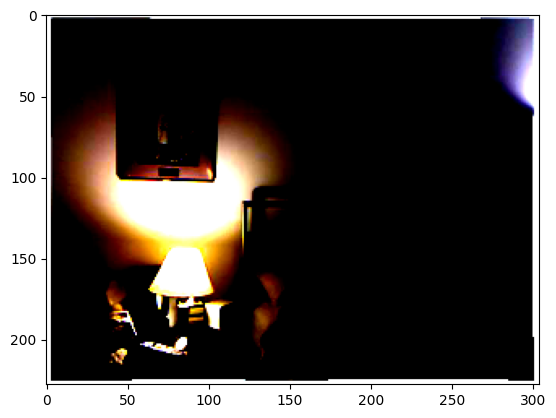

In [28]:
plt.imshow(img.permute(1,2,0))

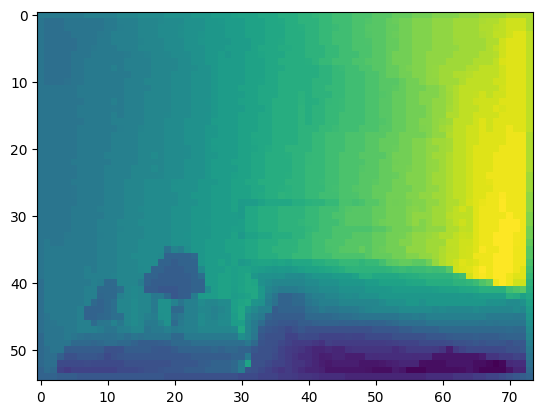

In [29]:
plt.imshow(label.permute(1,2,0))

In [30]:
#Agnostic code
device ="cuda" if torch.cuda.is_available() else"cpu"

In [31]:
model =  CNN()
model = model.to(device)

In [32]:
import torch.optim as optim
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(),lr =3e-4)

In [34]:
epoochs = 2
for epooch in range(epoochs):
  train_loss = 0
  for X_train,Y_train in train_loader:
    X_train,Y_train = X_train.to(device),Y_train.to(device)
    output = model(X_train)
    optimizer.zero_grad()
    Y_train = Y_train.squeeze()
    loss = loss_fn(output,Y_train)
    loss.backward()
    optimizer.step()
    train_loss +=loss.item()
  train_loss = train_loss / len(train_loader)
  print("Epooch{} \n Training Loss:{:.6f}".format(epooch,train_loss))

Epooch0 
 Training Loss:0.181622
Epooch1 
 Training Loss:0.011709


KeyboardInterrupt: ignored

In [42]:
import torch.nn.functional as F
test_loss = 0
model.eval()
acc = 0
with torch.inference_mode():
  for X_test,Y_test in test_loader:
    X_test,Y_test = X_test.to(device) ,Y_test.to(device)
    output = model(X_test) 
    Y_test = Y_test.squeeze()
    loss = loss_fn(output,Y_test)
    test_loss +=loss.item() 
      
  test_loss = loss / len(test_loader)
  
print("Test Loss:{:.6f}".format(test_loss))

Test Loss:137996.546875


In [43]:
test_features, test_labels = next(iter(test_loader))
print(f"Feature batch shape: {test_features.size()}")
print(f"Labels batch shape: {test_labels.size()}")

Feature batch shape: torch.Size([8, 3, 228, 304])
Labels batch shape: torch.Size([8, 1, 55, 74])


In [44]:
img = test_features[0].squeeze()
print(f"Image shape:{img.shape}")
label = test_labels[0]
print(f"Label shape:{label.shape}")

Image shape:torch.Size([3, 228, 304])
Label shape:torch.Size([1, 55, 74])


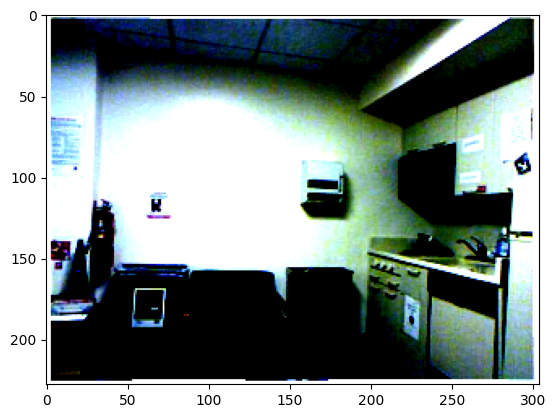

In [45]:
plt.imshow(img.permute(1,2,0))

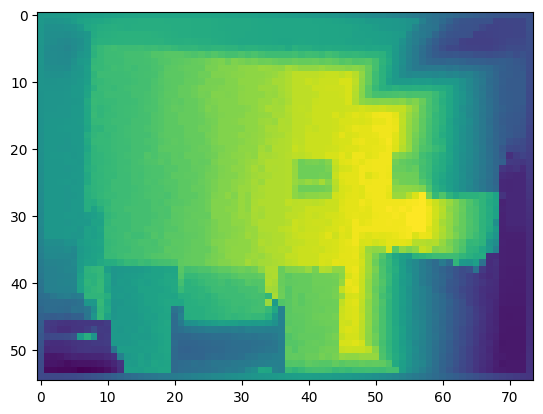

In [46]:
plt.imshow(label.permute(1,2,0))

In [47]:
# 1. Get a batch of images and labels from the DataLoader
img_batch, label_batch = next(iter(train_loader))
img_batch,label_batch = img_batch.to(device),label_batch.to(device)

# 2. Get a single image from the batch and unsqueeze the image so its shape fits the model
#img_single, label_single = img_batch[0].unsqueeze(dim=0).to(device), label_batch[0].to(device)
print(f"Single image shape: {img_batch.shape}\n")

# 3. Perform a forward pass on a single image
model.eval()
with torch.inference_mode():
    pred = model(img_batch)
    
# 4. Print out what's happening and convert model logits -> pred probs -> pred label
print(f"Output logits:\n{pred}\n")
print(pred.shape)
print(f"Output prediction probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_batch}")
print(label_batch.squeeze().shape)

Single image shape: torch.Size([8, 3, 228, 304])

Output logits:
tensor([[[0.3236, 0.3279, 0.3340,  ..., 0.3236, 0.3088, 0.3075],
         [0.3232, 0.3237, 0.3319,  ..., 0.3200, 0.3043, 0.3070],
         [0.3150, 0.3145, 0.3145,  ..., 0.3060, 0.3088, 0.3067],
         ...,
         [0.1640, 0.1640, 0.1640,  ..., 0.1640, 0.1640, 0.1640],
         [0.1640, 0.1640, 0.1640,  ..., 0.1640, 0.1640, 0.1640],
         [0.1640, 0.1640, 0.1640,  ..., 0.1640, 0.1640, 0.1717]],

        [[0.3277, 0.3222, 0.3278,  ..., 0.3783, 0.3507, 0.3537],
         [0.3271, 0.3185, 0.3250,  ..., 0.3780, 0.3457, 0.3537],
         [0.3287, 0.3286, 0.3278,  ..., 0.3742, 0.3686, 0.3697],
         ...,
         [0.2360, 0.2094, 0.2101,  ..., 0.2208, 0.1709, 0.2004],
         [0.2293, 0.2027, 0.2187,  ..., 0.2020, 0.1640, 0.1698],
         [0.2344, 0.2276, 0.2199,  ..., 0.2169, 0.1840, 0.1971]],

        [[0.3670, 0.3733, 0.4289,  ..., 0.2789, 0.2574, 0.2579],
         [0.3664, 0.3629, 0.4152,  ..., 0.2653, 0.2383, 0.